<a href="https://colab.research.google.com/github/abhijit8324/Machine_Learning_Projects/blob/main/pivot_charts_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hands-on Lab: Pivot Charts**


## Introduction
In this lab, we will learn how to use pivot charts for data analysis. Pivot charts play a crucial role in data analytics by enabling quick and intuitive exploration of multidimensional datasets. They allow analysts to summarize and visualize complex data relationships across multiple variables, facilitating insights that might be obscured in raw data tables. By dynamically aggregating and pivoting data, these charts provide a comprehensive view of trends, patterns, and correlations, empowering decision-makers to identify key factors influencing outcomes. Pivot charts enhance data-driven decision-making processes by simplifying complex data into actionable visual representations, thereby accelerating understanding and fostering informed strategies in diverse fields such as business analytics, market research, and scientific studies.


## Objectives

After completing this lab we will be able to:

 - Use Pivot charts for data analytics
 - Use different types of charts for different scenarios
 - Make deeper inferences from data based on the pivoted representations


----


## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.
*   [`sqlite3`](https://docs.python.org/3/library/sqlite3.html) for accessing the database


### Installing Required Libraries

Execute the following code to install the required libraries on the interface


In [1]:
%pip install pandas seaborn

### Importing Required Libraries

All libraries required for the codes below should be imported here.


In [2]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

### Download the database
Download the databaset from the cloud server by executing the code statement below.


In [3]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-11-05 10:26:40--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  32.5MB/s    in 1.1s    

2024-11-05 10:26:42 (32.5 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Load the database and read the data table as a Pandas dataframe for further usage, by executing the following code.


In [4]:
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection
QUERY = """SELECT * FROM master"""
df = pd.read_sql(QUERY,conn)

In [10]:
# check the columns of DataFrame

print(df.columns)

Index(['index', 'Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer',
       'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel',
       'UndergradMajor', 'OrgSize', 'YearsCode', 'Age1stCode', 'YearsCodePro',
       'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek',
       'LastHireDate', 'FizzBuzz', 'ResumeUpdate', 'CurrencySymbol',
       'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs',
       'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'OpSys', 'BlockchainOrg', 'BlockchainIs',
       'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion',
       'ScreenName', 'SOVisit1st', 'SOVisitFreq', 'SOFindAnswer',
       'SOTimeSaved', 'SOHowMuchTime', 'SOAccount', 'SOPartFreq', 'SOJobs',
       'EntTeams', 'SOComm', 'WelcomeChange', 'Age', 'Trans', 'Dependents',
       'SurveyLength', 'SurveyEase'],
      dtype='object')


### Scenario 1: Distribution of Respondents by Career Satisfaction and Job Satisfaction


In the first task, we can plot a distribution of the distribution of the respondents in terms of their Career Satisfaction and Job satisfaction. For this, we need to create a pivot with one of the axis representing unique values of `CareerSat` field, another axis representing `JobSat` values, and the data to be shown under each map to be set as the count of respondents. To achieve this, we can execute the code block shared below.


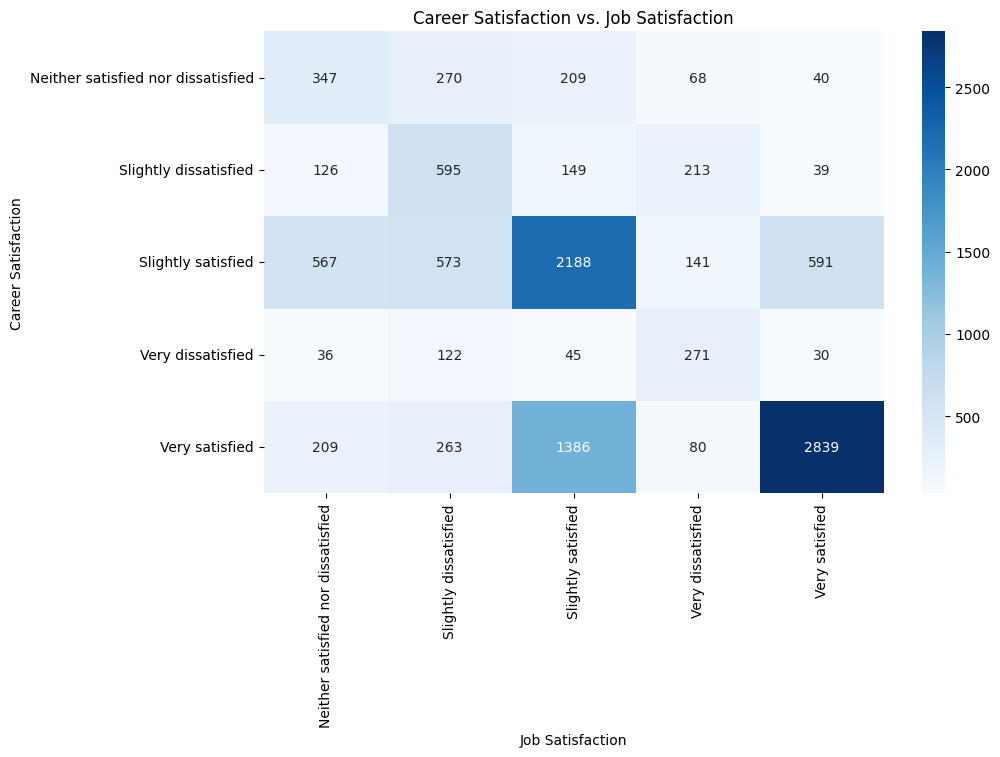

In [5]:
pivot_table = pd.pivot_table(df, index='CareerSat', columns='JobSat', values='Respondent', aggfunc='count', fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='g')
plt.title('Career Satisfaction vs. Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Career Satisfaction')
plt.show()

#### Inference:
Using a heatmap to visualize the relationship between career satisfaction and job satisfaction provides a clear overview of satisfaction levels across different dimensions. We can see that people 'Very Satisfied' with their current jobs are also 'Very Satisfied' with their careers.


### Scenario 2: Comparison of Open Source Adoption Across Operating Systems
In this scenario, you can visualize the adoption of Open Sourse systems across different operating systems by the respondents. To create this pivot chart, the `index` parameter, representing the x-axis, can be set as `OpSys`and the `columns` parameter can be set as `OpenSource`. The `values` parameter will be set as `Respondent` with aggregation function as `count`. This graph should be plotted as a grouped bar graph.

As a practice exercise, try to complete the code block below to generate the pivot chart yourself. Upon creation of the pivot chart, you can draw the inferences based on the visible distribution.


Index(['index', 'Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer',
       'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel',
       'UndergradMajor', 'OrgSize', 'YearsCode', 'Age1stCode', 'YearsCodePro',
       'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek',
       'LastHireDate', 'FizzBuzz', 'ResumeUpdate', 'CurrencySymbol',
       'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs',
       'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'OpSys', 'BlockchainOrg', 'BlockchainIs',
       'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion',
       'ScreenName', 'SOVisit1st', 'SOVisitFreq', 'SOFindAnswer',
       'SOTimeSaved', 'SOHowMuchTime', 'SOAccount', 'SOPartFreq', 'SOJobs',
       'EntTeams', 'SOComm', 'WelcomeChange', 'Age', 'Trans', 'Dependents',
       'SurveyLength', 'SurveyEase'],
      dtype='object')


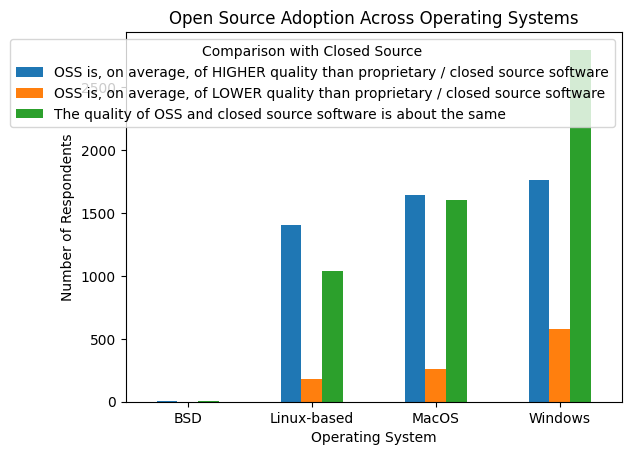

In [8]:
# Verify if the column 'Opr' exists in the DataFrame
print(df.columns)

# If the column is named differently (e.g., 'oprsystem'), change it accordingly:
# Check if 'OpSys' is the actual column name in your dataframe
pivot_table = pd.pivot_table(df, index='OpSys', columns='OpenSource', values='Respondent', aggfunc='count', fill_value=0)

# Plotting
pivot_table.plot(kind='bar')
plt.title('Open Source Adoption Across Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Number of Respondents')
plt.legend(title='Comparison with Closed Source')
plt.xticks(rotation=0)
plt.show()

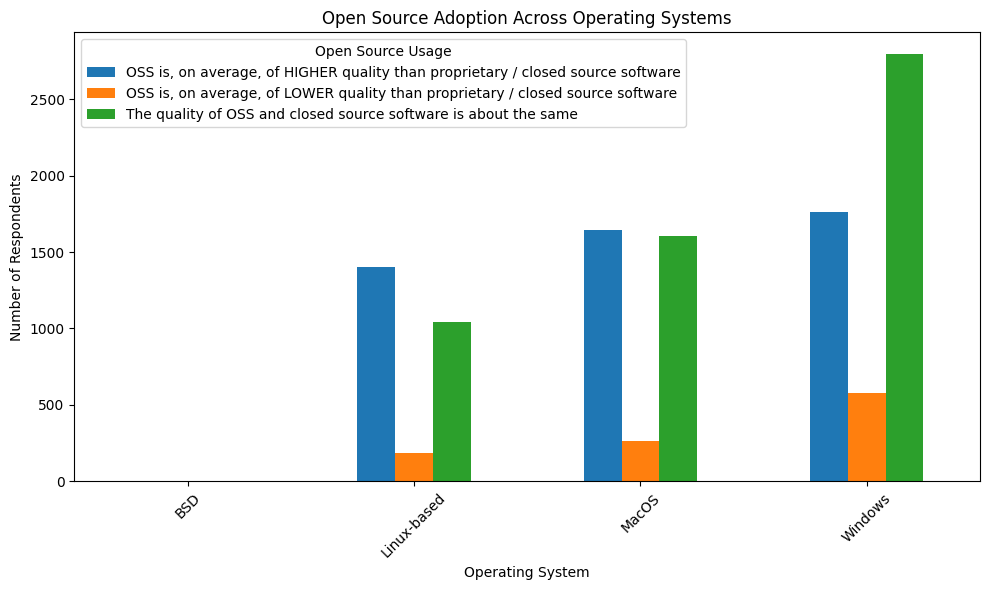

In [12]:
# Create the pivot table using 'OpSys' for operating systems and 'OpenSource'
pivot_table = pd.pivot_table(df, index='OpSys', columns='OpenSource', values='Respondent', aggfunc='count', fill_value=0)

# Plotting the pivot table
pivot_table.plot(kind='bar', figsize=(10, 6))  # Adjusting figure size for better visualization
plt.title('Open Source Adoption Across Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Number of Respondents')
plt.legend(title='Open Source Usage')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better fitting
plt.show()



### Scenario 3: Job Satisfaction and Career Aspirations by Employment Status

In this scenario, you can explore a deeper interpretation of the data using Pivot charts. Let us explore how employment status and job satisfaction affects the career aspirations of the respondents.

For this, you need to create a pivot table with 'Employment' and 'JobSat' fields as index, 'MgrWant' field as columns and 'Respondent' as values with aggregation function as 'count'. Complete the following code block to generate the said pivot chart.

Upon creation of the pivot chart, you can draw the inferences based on the visible distribution.


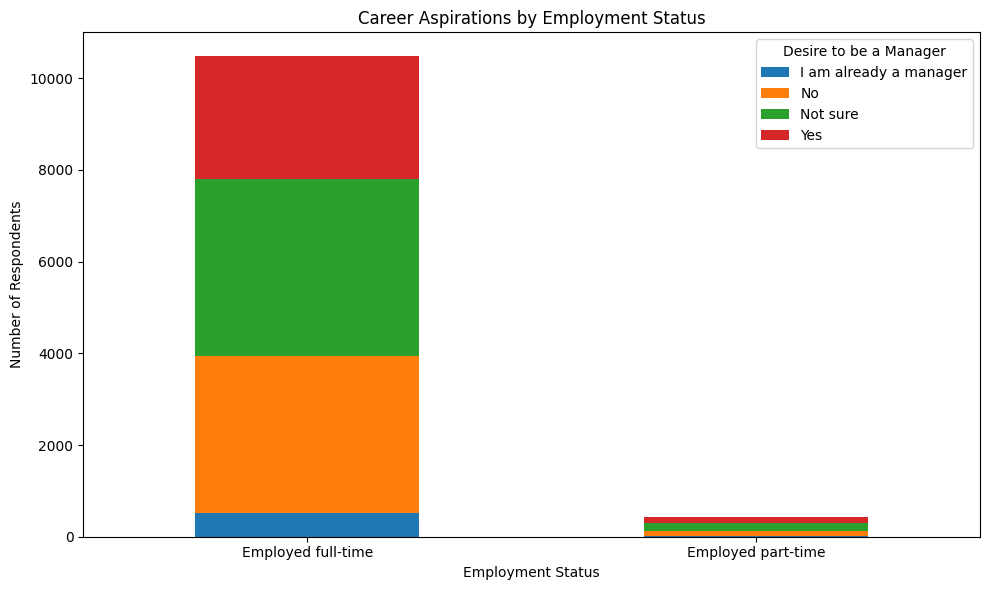

In [14]:
# Create the pivot table using 'Employment' for index and 'MgrWant' for columns
pivot_table = pd.pivot_table(df, index='Employment', columns='MgrWant', values='Respondent', aggfunc='count', fill_value=0)

# Plotting the pivot table
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))  # Adjusting figure size for better visualization
plt.title('Career Aspirations by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Number of Respondents')
plt.legend(title='Desire to be a Manager')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better fitting
plt.show()



In [15]:
df.to_excel('./data.xlsx', index=False)

In [16]:
df

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult
2,2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
3,3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult
4,4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11393,11393,25136,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,None,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,36.0,No,No,Appropriate in length,Difficult
11394,11394,25137,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Poland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are",Neutral,A lot more welcome now than last year,25.0,No,No,Appropriate in length,Neither easy nor difficult
11395,11395,25138,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,I have never participated in Q&A on Stack Over...,Yes,"No, I've heard of them, but I am not part of a...",Neutral,A lot more welcome now than last year,34.0,No,Yes,Too long,Easy
11396,11396,25141,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Switzerland,No,"Secondary school (e.g. American high school, G...",...,Daily or almost daily,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Somewhat less welcome now than last year,25.0,No,No,Appropriate in length,Easy


In [20]:
# Count the occurrences of each category in the 'MainBranch' column
majority_branch = df['MainBranch'].value_counts().idxmax()
majority_branch_count = df['MainBranch'].value_counts().max()

print(f"The majority of the survey responders are in the '{majority_branch}' category ({majority_branch_count} responders).")


The majority of the survey responders are in the 'I am a developer by profession' category (10618 responders).


In [18]:
df.columns

Index(['index', 'Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer',
       'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel',
       'UndergradMajor', 'OrgSize', 'YearsCode', 'Age1stCode', 'YearsCodePro',
       'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek',
       'LastHireDate', 'FizzBuzz', 'ResumeUpdate', 'CurrencySymbol',
       'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs',
       'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'OpSys', 'BlockchainOrg', 'BlockchainIs',
       'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion',
       'ScreenName', 'SOVisit1st', 'SOVisitFreq', 'SOFindAnswer',
       'SOTimeSaved', 'SOHowMuchTime', 'SOAccount', 'SOPartFreq', 'SOJobs',
       'EntTeams', 'SOComm', 'WelcomeChange', 'Age', 'Trans', 'Dependents',
       'SurveyLength', 'SurveyEase'],
      dtype='object')

In [21]:
# Count the occurrences of each country
majority_country = df['Country'].value_counts().idxmax()
majority_country_count = df['Country'].value_counts().max()

print(f"The majority of the survey responders are from '{majority_country}' ({majority_country_count} responders).")


The majority of the survey responders are from 'United States' (3127 responders).


In [22]:
# Count the occurrences of hobbyists
majority_hobbyist = df['Hobbyist'].value_counts().idxmax()
majority_hobbyist_count = df['Hobbyist'].value_counts().max()

print(f"The majority of the survey responders are hobbyists: '{majority_hobbyist}' ({majority_hobbyist_count} responders).")


The majority of the survey responders are hobbyists: 'Yes' (9273 responders).


In [24]:
# Define the list of options to check
options = ['Developer - front-end', 'Developer - back-end', 'Developer - mobile', 'Developer - full-stack']

# Count occurrences of each specified role
main_branch_counts = df['MainBranch'].value_counts()

# Filter counts to include only the specified options
filtered_counts = main_branch_counts[main_branch_counts.index.isin(options)]

# Get the most common role and its count
if not filtered_counts.empty:
    majority_role = filtered_counts.idxmax()
    majority_role_count = filtered_counts.max()
    print(f"The majority of the survey responders are: {majority_role} ({majority_role_count} responders)")
else:
    print("None of the specified options are present in the survey data.")



None of the specified options are present in the survey data.


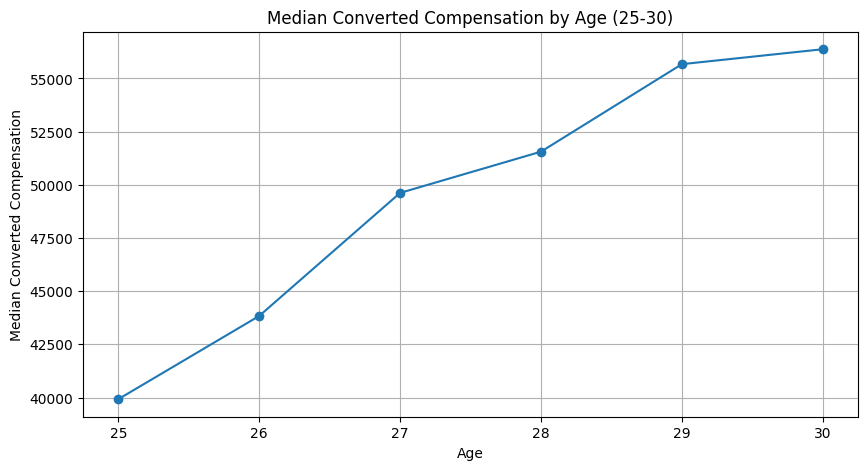

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataframe for age group 25-30
age_group = df[(df['Age'] >= 25) & (df['Age'] <= 30)]

# Calculate the median ConvertedComp for each age
median_comp_by_age = age_group.groupby('Age')['ConvertedComp'].median()

# Plotting
plt.figure(figsize=(10, 5))
median_comp_by_age.plot(kind='line', marker='o')
plt.title('Median Converted Compensation by Age (25-30)')
plt.xlabel('Age')
plt.ylabel('Median Converted Compensation')
plt.grid()
plt.show()
